## Следует реализовать выделение проблемных зубьев у шестеренки.

In [165]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [167]:
def get_image(path):
    return cv2.imread(path)

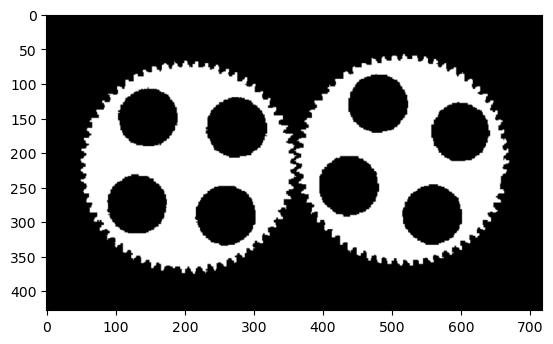

In [209]:
image = get_image('gears.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

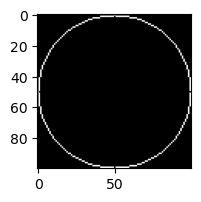

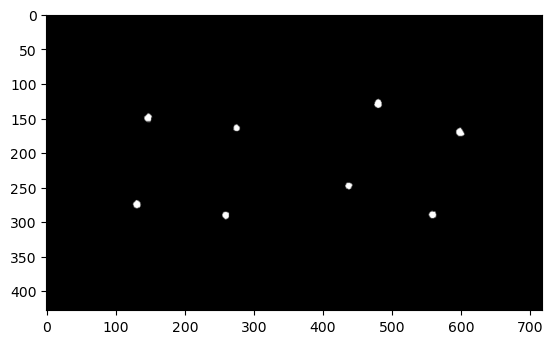

In [211]:
radius = 100

hole_ring = np.zeros((radius, radius), dtype=np.uint8)
cv2.circle(hole_ring, (radius // 2, radius // 2), radius // 2, 1)

plt.figure(figsize=(2, 2))
plt.imshow(hole_ring, cmap="gray")
plt.show()

eroded_image = cv2.erode(image, hole_ring)
plt.imshow(eroded_image, cmap='gray')
plt.show()

In [213]:
def get_circle(radius):
    size = radius * 2 + 1
    mask = np.zeros((size, size), dtype=np.uint8)
    cv2.circle(mask, (radius, radius), radius, 1, -1) 
    return mask

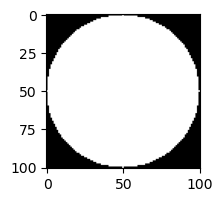

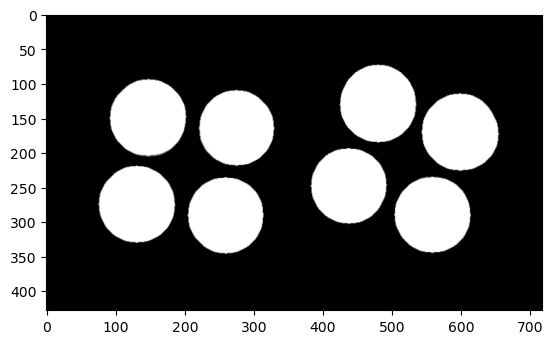

In [215]:
hole_mask = get_circle(50)
plt.figure(figsize=(2, 2))
plt.imshow(hole_mask, cmap="gray")
plt.show()

dilated_image = cv2.dilate(eroded_image, hole_mask)
plt.imshow(dilated_image, cmap='gray')
plt.show()

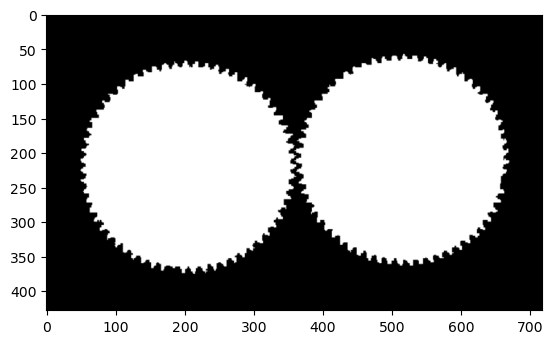

In [217]:
image = cv2.bitwise_or(dilated_image, image)
plt.imshow(image, cmap='gray')
plt.show()

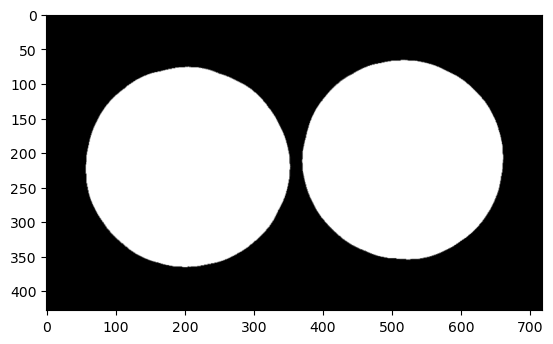

In [219]:
gear_body = get_circle(100)

opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, gear_body)
plt.imshow(opened_image, cmap='gray')
plt.show()

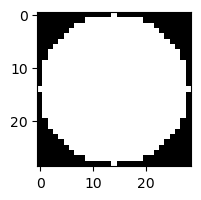

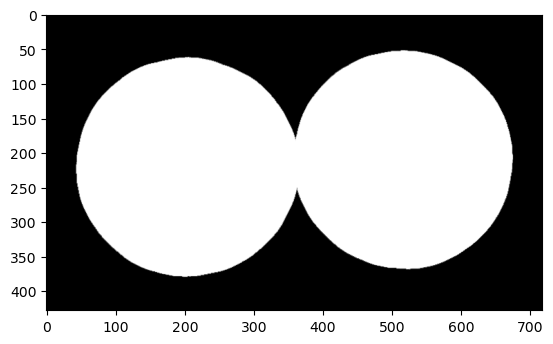

In [181]:
hole_mask = get_circle(14) 

plt.figure(figsize=(2, 2))
plt.imshow(hole_mask, cmap="gray")
plt.show()

dilated_image = cv2.dilate(opened_image, hole_mask)
plt.imshow(dilated_image, cmap='gray')
plt.show()

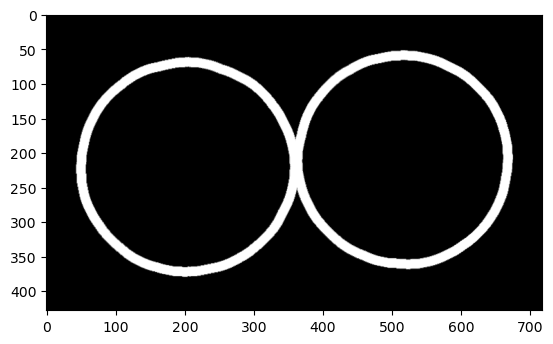

In [183]:
teeth = cv2.subtract(dilated_image, opened_image)
plt.imshow(teeth, cmap='gray')
plt.show()

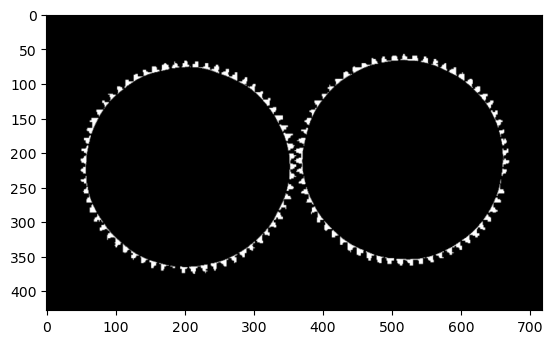

In [185]:
teeth_only = cv2.bitwise_and(teeth, image)
plt.imshow(teeth_only, cmap="gray")
plt.show()

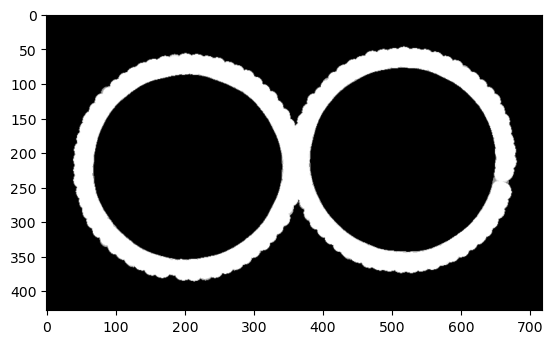

In [187]:
tip_spacing = get_circle(11)

tip_spacing_dilated = cv2.dilate(teeth_only, tip_spacing)
plt.imshow(tip_spacing_dilated, cmap="gray")
plt.show()

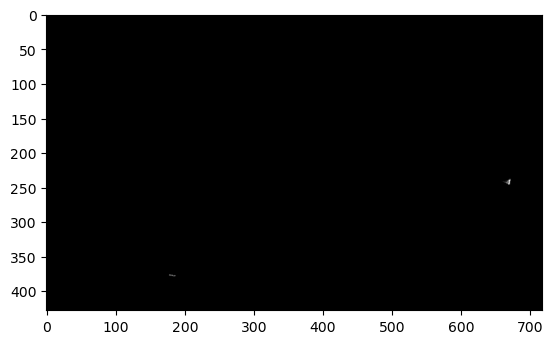

In [189]:
defects = cv2.subtract(dilated_image, tip_spacing_dilated)
small_defects = cv2.subtract(teeth, tip_spacing_dilated)
plt.imshow(small_defects, cmap="gray")
plt.show()

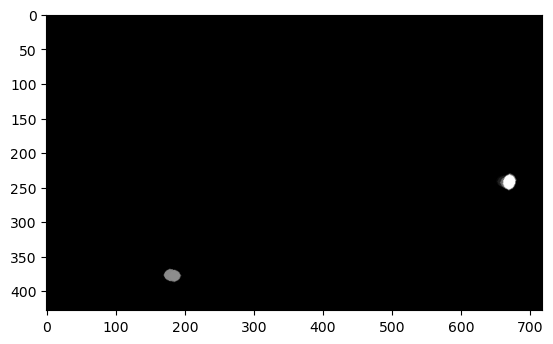

In [203]:
defect_cue = get_circle(4)

defect_highlighted = cv2.dilate(small_defects, defect_cue, iterations=2)
plt.imshow(defect_highlighted, cmap="gray")
plt.show()

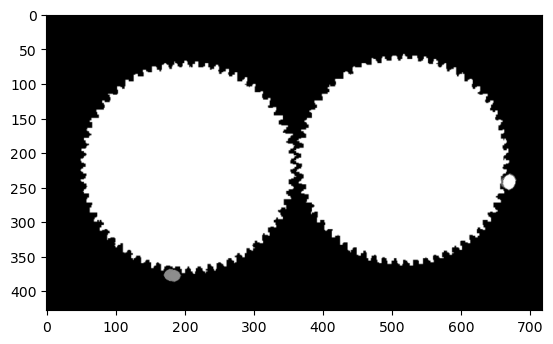

In [205]:
result = cv2.bitwise_or(image, defect_highlighted)
plt.imshow(result, cmap="gray")
plt.show()